In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping


Classification

In [31]:
from data.load_data import load_monk
path = os.getcwd()
file = '/data/monks-3.train'
file_test = '/data/monks-3.test'

labels = ['class','x1','x2','x3','x4','x5','x6']


X_train, y_train = load_monk(path+file)
X_test, y_test = load_monk(path+file_test)

print(X_train.shape)
print(y_train.shape)

(122, 6)
(122, 1)


In [32]:
# xtrain and test to dataframe
X_train = pd.DataFrame(X_train, columns=labels[1:])
X_test = pd.DataFrame(X_test, columns=labels[1:])
# one hot encoding of X_train and X_test
X_train = pd.get_dummies(X_train, columns=labels[1:])
X_test = pd.get_dummies(X_test, columns=labels[1:])
X_test = X_test.values
X_train = X_train.values

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(122, 17)
(122, 1)
(432, 17)
(432, 1)


0.9351851851851852


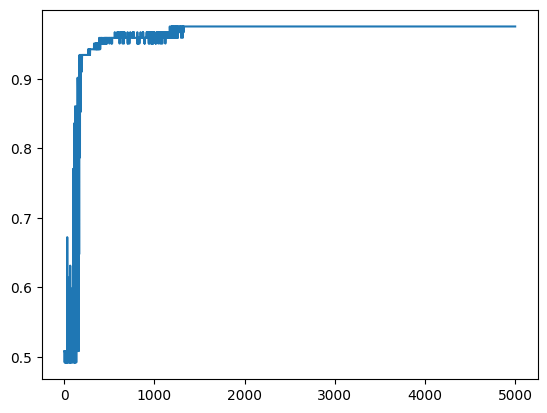

In [36]:
mlp = MLP([12,12], 17, 1, task = "classification", activation_function = "sigmoid")

mlp.fit(X_train, y_train, n_epochs = 5000, batch_size = 50, error = "NLL", step = 1, regularization = 'no', momentum = 0.3,
        early_stopping = True, patience = 100, verbose = True, tolerance = 0.01)

y_pred = mlp.predict(X_test)

acc = get_metric_instance("accuracy")
print(acc(y_test, y_pred))
plt.plot(mlp.learning_curve)

Regression

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping
path = os.getcwd()
file = '/data/ML-CUP22-TR.csv'

labels = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']

TR = pd.read_csv(path + file, sep = ',', header = None, usecols=range(1,12), \
                 names = labels, skiprows = 7)

TR = TR.to_numpy()

np.random.shuffle(TR)

TR = np.split(TR, [9], axis = 1)

X = TR[0]
y_true = TR[1]

print(y_true)
print(X.shape)
print(y_true.shape)

n_epochs = 500

[[ 15.401821 -29.530884]
 [  3.868354 -26.117116]
 [  5.007746 -17.253839]
 ...
 [ 18.137139 -31.08028 ]
 [  9.879381 -29.474929]
 [  8.619835 -31.899873]]
(1492, 9)
(1492, 2)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)
mlp = MLP([18, 18], 9, 2, task = "regression", activation_function = "sigmoid")
grid_space = {
    'n_epochs': [2000, 500],
    'batch_size': [50, 100],
    #'step': [0.1, 0.01],
    #'momentum': [0.3, 0.5],
    #'regularization': ['no', 'L1', 'L2'],
    #'tolerance': [0.01, 0.001],
    #'patience': [100, 200],
    #'early_stopping': [True, False],
    #'nesterov': [True, False],
    #'alpha_l1': [0.1, 0.01],
    #'alpha_l2': [0.1, 0.01],
    #'weight_init': ['scaled', 'xavier', 'he'],
}
grid = GridSearch(mlp)
grid.fit(X_train, y_train, grid_space, get_eta = True, verbose = True, parallel = False, n_folds = 5)

Computing ETA
Grid search of combinations: 4
Parallelisation not active


 25%|██▌       | 1/4 [01:58<05:56, 118.88s/it]

-----------------------------------
Combination 1/4
Parameters: {'n_epochs': 2000, 'batch_size': 50}
Validation score: 2.0705517096323334


 50%|█████     | 2/4 [03:35<03:31, 105.80s/it]

-----------------------------------
Combination 2/4
Parameters: {'n_epochs': 2000, 'batch_size': 100}
Validation score: 1.7934926200826442


 75%|███████▌  | 3/4 [04:07<01:12, 72.00s/it] 

-----------------------------------
Combination 3/4
Parameters: {'n_epochs': 500, 'batch_size': 50}
Validation score: 2.220791665298978


100%|██████████| 4/4 [04:26<00:00, 66.60s/it]

-----------------------------------
Combination 4/4
Parameters: {'n_epochs': 500, 'batch_size': 100}
Validation score: 1.7440416203315383


Best parameters: {'n_epochs': 500, 'batch_size': 100}
Best score: 1.7440416203315383


1.834783862664742


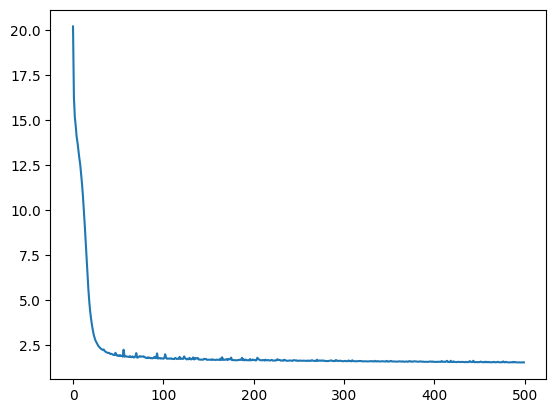

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)
mlp = MLP([9, 9], 9, 2, task = "regression", activation_function = "sigmoid")
mlp.fit(X_train, y_train, n_epochs = 500, batch_size = 200, verbose = True, weights_initialization = 'scaled', weights_mean = 0, weights_scale = 1, step=0.1)
y_pred = mlp.predict(X_test)
mse = get_metric_instance("mse")
print(mse(y_test, y_pred))
plt.plot(mlp.learning_curve)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

for step in [0.005, 0.01, 0.05, 0.1]:
    mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step)
    ax.plot(range(n_epochs), mlp.learning_curve, label = 'step = ' + str(step), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different values of the learning rate")  
ax.legend()


In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for alpha_l2 in [0, 0.005, 0.01, 0.05, 0.1]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step, regularization = "L2", alpha_l2 = alpha_l2)
    ax.plot(range(n_epochs), learning_curve, label = 'alpha L2 = ' + str(alpha_l2), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different regularization")  
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5
for momentum in [0, 0.1, 0.3]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different momentum")  
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for batch_size in [1, 100]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = batch_size, step = step)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'batch_size = ' + str(batch_size))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different batch size")  
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5

momentum = 0
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

momentum = 0.2
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum, Nesterov = True)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum) + ' (Nesterov)')

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')    
ax.legend()

In [ ]:
n_classes = 5
input_size = 5
mlp = MLP([5, 5], input_size, n_classes, task = "classification")